In [2]:
import os
import mujoco
import mujoco.rollout
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time

In [3]:
os.environ['MUJOCO_GL'] = "glfw"

In [4]:
model_filename = 'rodent.xml'
model = mujoco.MjModel.from_xml_path(model_filename)

In [3]:
base_steps = 1024*512
results = []
for camera in ("side", "top", "egocentric"):
    for res in tqdm.tqdm((16, 32, 64, 128, 256, 512, 1024, 2048), desc=camera):
        steps = base_steps // res
        scene_option = mujoco.MjvOption()
        scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = False
        scene_option.flags[mujoco.mjtVisFlag.mjVIS_SKIN] = False
        scene_option.flags[mujoco.mjtVisFlag.mjVIS_FLEXSKIN] = False
        scene_option.flags[mujoco.mjtVisFlag.mjVIS_TEXTURE] = True
        model.vis.global_.offheight = res
        model.vis.global_.offwidth = res
        data = mujoco.MjData(model)
        with mujoco.Renderer(model, height=res, width=res) as rend:
            mujoco.mj_step(model, data)
            mujoco.mj_forward(model, data)
            img = rend.render()
            s_time = time.time()
            for i in range(steps):
                rend.update_scene(data, camera=camera, scene_option=scene_option)
                rend.scene.flags[mujoco.mjtRndFlag.mjRND_FOG] = False
                rend.scene.flags[mujoco.mjtRndFlag.mjRND_SHADOW] = False
                rend.scene.flags[mujoco.mjtRndFlag.mjRND_REFLECTION] = False
                rend.render(out=img)
            e_time = time.time()
            results.append((camera, res, steps, e_time - s_time))
        #plt.imshow(img)

side:  12%|██████████████████▍                                                                                                                                | 1/8 [00:11<01:23, 11.86s/it]


KeyboardInterrupt: 

In [138]:
df = pd.DataFrame(results, columns=["camera", "resolution", "steps", "total_time"])
df["fps"] = df.steps / df.total_time
df["res_string"] = df.resolution.astype("str") + "x" + df.resolution.astype("str")

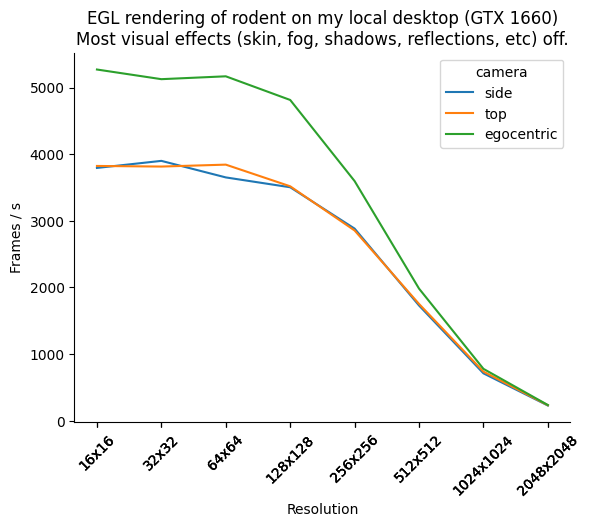

In [140]:
sns.lineplot(data=df, x="resolution", y="fps", hue="camera")
plt.xscale("log")
plt.xticks(df.resolution, df.res_string, rotation=45)
plt.xticks([], minor=True)
plt.xlabel("Resolution")
plt.ylabel("Frames / s")
plt.title("EGL rendering of rodent on my local desktop (GTX 1660)\nMost visual effects (skin, fog, shadows, reflections, etc) off.")
sns.despine()

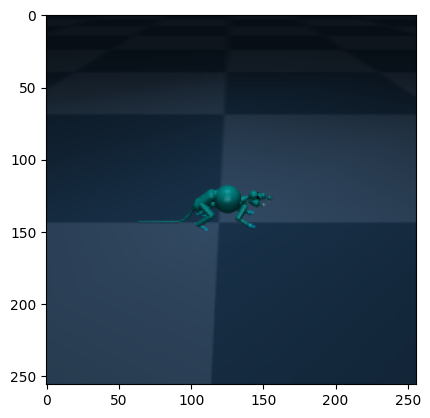

In [23]:
scene_option = mujoco.MjvOption()
scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = False
scene_option.flags[mujoco.mjtVisFlag.mjVIS_SKIN] = False
scene_option.flags[mujoco.mjtVisFlag.mjVIS_FLEXSKIN] = False
scene_option.flags[mujoco.mjtVisFlag.mjVIS_TEXTURE] = True
model.vis.global_.offheight = 256
model.vis.global_.offwidth = 256
with mujoco.Renderer(model, height=256, width=256) as rend:
    mujoco.mj_step(model, data)
    mujoco.mj_forward(model, data)
    rend.scene.flags[mujoco.mjtRndFlag.mjRND_FOG] = False
    rend.scene.flags[mujoco.mjtRndFlag.mjRND_SHADOW] = False
    rend.scene.flags[mujoco.mjtRndFlag.mjRND_REFLECTION] = False
    rend.update_scene(data, camera="side", scene_option=scene_option)
    img = rend.render()
    plt.imshow(img)
    #print(dir(rend.scene))
    #

In [109]:
rend.scene.flags

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=uint8)

In [95]:
model.vis.global_

<Global
  azimuth: 90.0
  bvactive: 1
  elevation: -45.0
  ellipsoidinertia: 0
  fovy: 45.0
  glow: 0.30000001192092896
  ipd: 0.06800000369548798
  linewidth: 1.0
  offheight: 2048
  offwidth: 2048
  realtime: 1.0
>

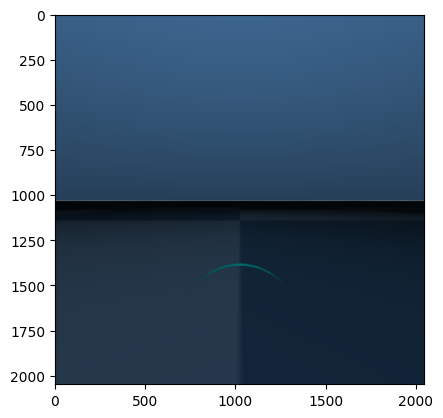

In [94]:
plt.imshow(img)

In [45]:
df

,camera,resolution,steps,total_time,fps,res_string
0,side,16,100,0.369601,270.562205,16x16
1,side,32,100,0.122153,818.643578,32x32
2,side,64,100,0.136718,731.432398,64x64
3,side,128,100,0.122430,816.791104,128x128
4,side,256,100,0.130788,764.595627,256x256
5,side,512,100,0.217012,460.803150,512x512
6,side,1024,100,0.250271,399.566358,1024x1024
7,side,2048,100,0.651819,153.416769,2048x2048
8,top,16,100,0.129608,771.557812,16x16
9,top,32,100,0.129381,772.912789,32x32


In [57]:
scene_option = mujoco.MjvOption()
scene_option.flags
#scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = True

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [104]:
scene_option.


<MjvOption
  actuatorgroup: array([1, 1, 1, 0, 0, 0], dtype=uint8)
  bvh_depth: 1
  flags: array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)
  flex_layer: 0
  flexgroup: array([1, 1, 1, 0, 0, 0], dtype=uint8)
  frame: 0
  geomgroup: array([1, 1, 1, 0, 0, 0], dtype=uint8)
  jointgroup: array([1, 1, 1, 0, 0, 0], dtype=uint8)
  label: 0
  sitegroup: array([1, 1, 1, 0, 0, 0], dtype=uint8)
  skingroup: array([1, 1, 1, 0, 0, 0], dtype=uint8)
  tendongroup: array([1, 1, 1, 0, 0, 0], dtype=uint8)
>

In [ ]:
data.us

In [63]:
?mujoco.mjtVisFlagmujoco.mjtRndFlag

Docstring:     
Members:

mjVIS_CONVEXHULL

mjVIS_TEXTURE

mjVIS_JOINT

mjVIS_CAMERA

mjVIS_ACTUATOR

mjVIS_ACTIVATION

mjVIS_LIGHT

mjVIS_TENDON

mjVIS_RANGEFINDER

mjVIS_CONSTRAINT

mjVIS_INERTIA

mjVIS_SCLINERTIA

mjVIS_PERTFORCE

mjVIS_PERTOBJ

mjVIS_CONTACTPOINT

mjVIS_ISLAND

mjVIS_CONTACTFORCE

mjVIS_CONTACTSPLIT

mjVIS_TRANSPARENT

mjVIS_AUTOCONNECT

mjVIS_COM

mjVIS_SELECT

mjVIS_STATIC

mjVIS_SKIN

mjVIS_FLEXVERT

mjVIS_FLEXEDGE

mjVIS_FLEXFACE

mjVIS_FLEXSKIN

mjVIS_BODYBVH

mjVIS_FLEXBVH

mjVIS_MESHBVH

mjVIS_SDFITER

mjNVISFLAG
Init docstring:
__init__(*args, **kwargs)
Overloaded function.

1. __init__(self: mujoco._enums.mjtVisFlag, value: int) -> None

2. __init__(self: mujoco._enums.mjtVisFlag, value: int) -> None
File:           ~/pyenvs/build_mujoco/lib/python3.10/site-packages/mujoco/_enums.cpython-310-x86_64-linux-gnu.so
Type:           pybind11_type
Subclasses:     

In [77]:
mujoco.mjtVisFlag.mjVIS_CONVEXHULL

<mjtVisFlag.mjVIS_CONVEXHULL: 0>

In [74]:
for i in range(len(scene_option.flags)):
    print(i, mujoco.mjtVisFlag(i), scene_option.flags[i])

0 mjtVisFlag.mjVIS_CONVEXHULL 0
1 mjtVisFlag.mjVIS_TEXTURE 1
2 mjtVisFlag.mjVIS_JOINT 0
3 mjtVisFlag.mjVIS_CAMERA 0
4 mjtVisFlag.mjVIS_ACTUATOR 0
5 mjtVisFlag.mjVIS_ACTIVATION 0
6 mjtVisFlag.mjVIS_LIGHT 0
7 mjtVisFlag.mjVIS_TENDON 1
8 mjtVisFlag.mjVIS_RANGEFINDER 1
9 mjtVisFlag.mjVIS_CONSTRAINT 0
10 mjtVisFlag.mjVIS_INERTIA 0
11 mjtVisFlag.mjVIS_SCLINERTIA 0
12 mjtVisFlag.mjVIS_PERTFORCE 0
13 mjtVisFlag.mjVIS_PERTOBJ 1
14 mjtVisFlag.mjVIS_CONTACTPOINT 0
15 mjtVisFlag.mjVIS_ISLAND 1
16 mjtVisFlag.mjVIS_CONTACTFORCE 0
17 mjtVisFlag.mjVIS_CONTACTSPLIT 0
18 mjtVisFlag.mjVIS_TRANSPARENT 0
19 mjtVisFlag.mjVIS_AUTOCONNECT 0
20 mjtVisFlag.mjVIS_COM 0
21 mjtVisFlag.mjVIS_SELECT 0
22 mjtVisFlag.mjVIS_STATIC 1
23 mjtVisFlag.mjVIS_SKIN 1
24 mjtVisFlag.mjVIS_FLEXVERT 0
25 mjtVisFlag.mjVIS_FLEXEDGE 0
26 mjtVisFlag.mjVIS_FLEXFACE 0
27 mjtVisFlag.mjVIS_FLEXSKIN 1
28 mjtVisFlag.mjVIS_BODYBVH 0
29 mjtVisFlag.mjVIS_FLEXBVH 0
30 mjtVisFlag.mjVIS_MESHBVH 0
31 mjtVisFlag.mjVIS_SDFITER 0


In [75]:
mujoco.mjtVisFlag("mjVIS_SELECT")

TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. mujoco._enums.mjtVisFlag(value: int)
    2. mujoco._enums.mjtVisFlag(value: int)

Invoked with: 'mjVIS_SELECT'

In [114]:
for i in range(10):
    print(i, mujoco.mjtRndFlag(i), rend.scene.flags[i])

0 mjtRndFlag.mjRND_SHADOW 1
1 mjtRndFlag.mjRND_WIREFRAME 0
2 mjtRndFlag.mjRND_REFLECTION 1
3 mjtRndFlag.mjRND_ADDITIVE 0
4 mjtRndFlag.mjRND_SKYBOX 1
5 mjtRndFlag.mjRND_FOG 0
6 mjtRndFlag.mjRND_HAZE 1
7 mjtRndFlag.mjRND_SEGMENT 0
8 mjtRndFlag.mjRND_IDCOLOR 0
9 mjtRndFlag.mjRND_CULL_FACE 1


In [157]:
def benchmark_rendering(model, camera, res, steps, backend="egl",
                        visJoint=False, visSkin=False,
                        visFlexSkin=False, visTexture=True,
                        visFog=False, visShadow=False, visReflection=False):
        os.environ['MUJOCO_GL'] = backend
        scene_option = mujoco.MjvOption()
        scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = visJoint
        scene_option.flags[mujoco.mjtVisFlag.mjVIS_SKIN] = visSkin
        scene_option.flags[mujoco.mjtVisFlag.mjVIS_FLEXSKIN] = visFlexSkin
        scene_option.flags[mujoco.mjtVisFlag.mjVIS_TEXTURE] = visTexture
        model.vis.global_.offheight = res
        model.vis.global_.offwidth = res
        data = mujoco.MjData(model)
        with mujoco.Renderer(model, height=res, width=res) as rend:
            mujoco.mj_step(model, data)
            mujoco.mj_forward(model, data)
            img = rend.render()
            s_time = time.time()
            for i in range(steps):
                rend.update_scene(data, camera=camera, scene_option=scene_option)
                rend.scene.flags[mujoco.mjtRndFlag.mjRND_FOG] = visFog
                rend.scene.flags[mujoco.mjtRndFlag.mjRND_SHADOW] = visSkin
                rend.scene.flags[mujoco.mjtRndFlag.mjRND_REFLECTION] = visTexture
                rend.render(out=img)
            e_time = time.time()
        return steps / (e_time - s_time)

In [6]:
setups = [
    dict(visJoint=True,  visSkin=True, visFlexSkin=True, visTexture=True, visFog=True, visShadow=True, visReflection=True),
    dict(visJoint=False, visSkin=True, visFlexSkin=True, visTexture=True, visFog=True, visShadow=True, visReflection=True),
    dict(visJoint=False, visSkin=True, visFlexSkin=False, visTexture=True, visFog=False, visShadow=True, visReflection=True),
    dict(visJoint=False, visSkin=False, visFlexSkin=False, visTexture=True, visFog=False, visShadow=True, visReflection=True),
    dict(visJoint=False,  visSkin=False, visFlexSkin=False, visTexture=True, visFog=True, visShadow=True, visReflection=True),
    dict(visJoint=False, visSkin=False, visFlexSkin=False, visTexture=True, visFog=False, visShadow=False, visReflection=True),
    dict(visJoint=False, visSkin=False, visFlexSkin=False, visTexture=True, visFog=False, visShadow=True, visReflection=False),
    dict(visJoint=False, visSkin=False, visFlexSkin=False, visTexture=True, visFog=False, visShadow=False, visReflection=False),
    dict(visJoint=False, visSkin=False, visFlexSkin=False, visTexture=False, visFog=True, visShadow=True, visReflection=True),
    dict(visJoint=False, visSkin=True, visFlexSkin=False, visTexture=True, visFog=False, visShadow=False, visReflection=False),
    dict(visJoint=False, visSkin=True, visFlexSkin=False, visTexture=False, visFog=False, visShadow=False, visReflection=False),
    dict(visJoint=False, visSkin=True, visFlexSkin=True, visTexture=True, visFog=False, visShadow=False, visReflection=False),
    dict(visJoint=False, visSkin=True, visFlexSkin=True, visTexture=False, visFog=False, visShadow=False, visReflection=False),
    dict(visJoint=False, visSkin=True, visFlexSkin=True, visTexture=False, visFog=True, visShadow=False, visReflection=False),
    dict(visJoint=False, visSkin=False, visFlexSkin=False, visTexture=False, visFog=True, visShadow=False, visReflection=False),
    dict(visJoint=True, visSkin=False, visFlexSkin=False, visTexture=False, visFog=False, visShadow=False, visReflection=False),
    dict(visJoint=False, visSkin=False, visFlexSkin=False, visTexture=False, visFog=False, visShadow=False, visReflection=False),
]

In [357]:
results = []
for basics in [
    dict(model=model, camera="side", res=256, steps=1024*8, backend="egl"),
    dict(model=model, camera="egocentric", res=256, steps=1024*8, backend="egl"),
    dict(model=model, camera="egocentric", res=64, steps=1024*8, backend="egl"),
]:
    for setup in tqdm.tqdm(setups):
        basics.update(setup)
        result = basics.copy()
        result["fps"] = benchmark_rendering(**basics)
        results.append(result)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [01:28<00:00,  5.51s/it]


In [349]:
import IPython.display

In [358]:
def to_html_table(results):
    res  = "<table>"
    res += "<tr><th>Camera</th><th>Resolution</th><th>Backend</th><th colspan=\"7\" style=\"text-align:center\">Included features</th><th style=\"text-align:left\">Frames / s</th></tr>"
    res += "<tr>"
    for col in ["", "", "", "Joints", "Skin", "FlexSkin", "Textures", "Fog", "Shadows", "Reflections", ""]:
        res += f"<td><span style=\"writing-mode: sideways-lr;\">{col}</span></td>"
    res += "</tr>"
    for r in results.itertuples():
        res += "<tr>"
        res += f"<td>{r.camera}</td>"
        res += f"<td>{r.res} x {r.res}</td>"
        res += f"<td>{r.backend}</td>"
        for visFeature in ['visJoint', 'visSkin', 'visFlexSkin', 'visTexture', 'visFog', 'visShadow', 'visReflection']:
            symbol = "✅" if getattr(r, visFeature) else "❌"
            res += f"<td>{symbol}</td>"
        res += f'''<td style=\"text-align:left\">
                        <div style='display: inline-block;
                                    background-color: darkblue;
                                    width: {(r.fps/20):.1f}px;
                                    height: 15px;
                                    margin-right: 2px;
                                    margin-top: 2px;
                                    margin-bottom: 0px;'></div>
                        {r.fps:.2f}
                    </td>'''
        res += "</tr>"
    res += "</table>"
    return IPython.display.HTML(res)

In [361]:
to_html_table(pd.DataFrame(results).query('camera == "side"'))

In [8]:
def example_rendering(model, camera, res, backend="egl",
                        visJoint=False, visSkin=False,
                        visFlexSkin=False, visTexture=True,
                        visFog=False, visShadow=False, visReflection=False):
        os.environ['MpaycheckUJOCO_GL'] = backend
        scene_option = mujoco.MjvOption()
        scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = visJoint
        scene_option.flags[mujoco.mjtVisFlag.mjVIS_SKIN] = visSkin
        scene_option.flags[mujoco.mjtVisFlag.mjVIS_FLEXSKIN] = visFlexSkin
        scene_option.flags[mujoco.mjtVisFlag.mjVIS_TEXTURE] = visTexture
        model.vis.global_.offheight = res
        model.vis.global_.offwidth = res
        data = mujoco.MjData(model)paycheck
        img = np.full((res, res, 3), 255, np.uint8)
        with mujoco.Renderer(model, height=res, width=res) as rend:
            mujoco.mj_step(model, data)
            rend.update_scene(data, camera=camera, scene_option=scene_option)
            rend.scene.flags[mujoco.mjtRndFlag.mjRND_FOG] = visFog
            rend.scene.flags[mujoco.mjtRndFlag.mjRND_SHADOW] = visShadow
            rend.scene.flags[mujoco.mjtRndFlag.mjRND_REFLECTION] = visReflection
            rend.render(out=img)
        return img

In [9]:
df = pd.DataFrame(results)

In [10]:
df.itertuples()

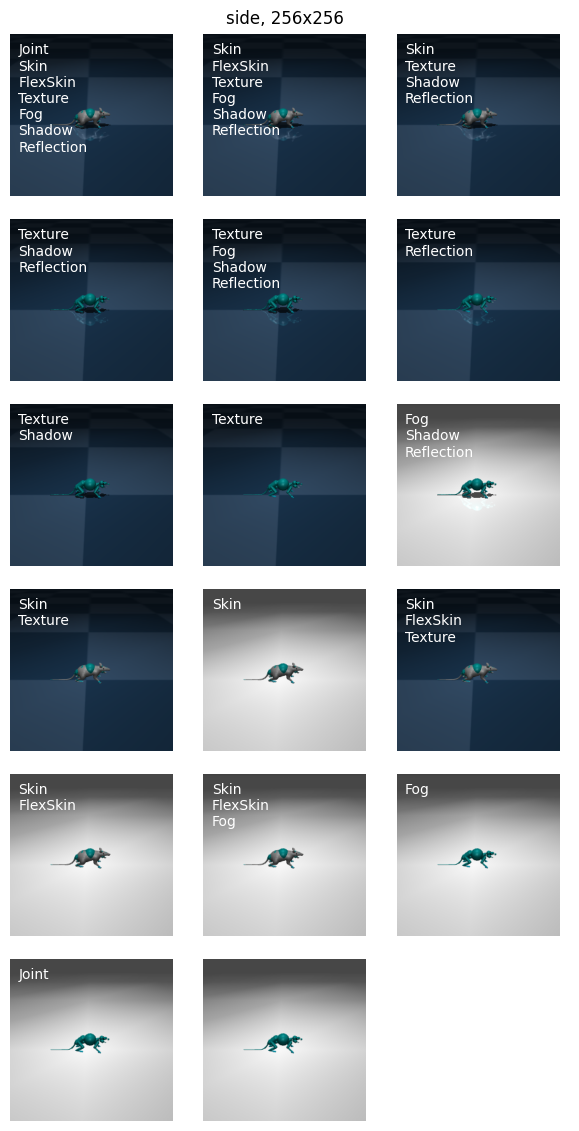

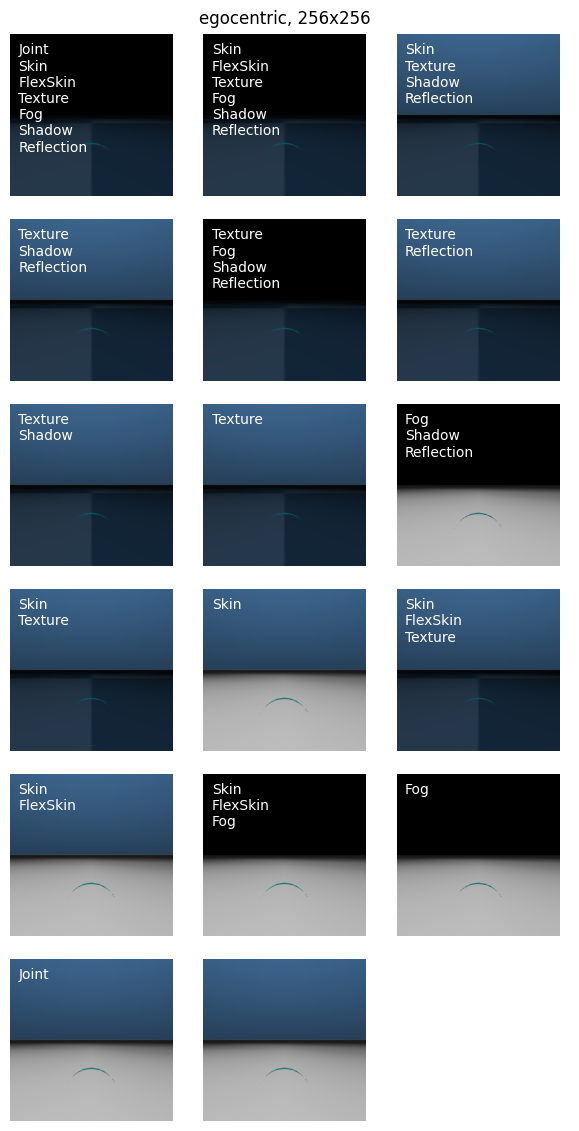

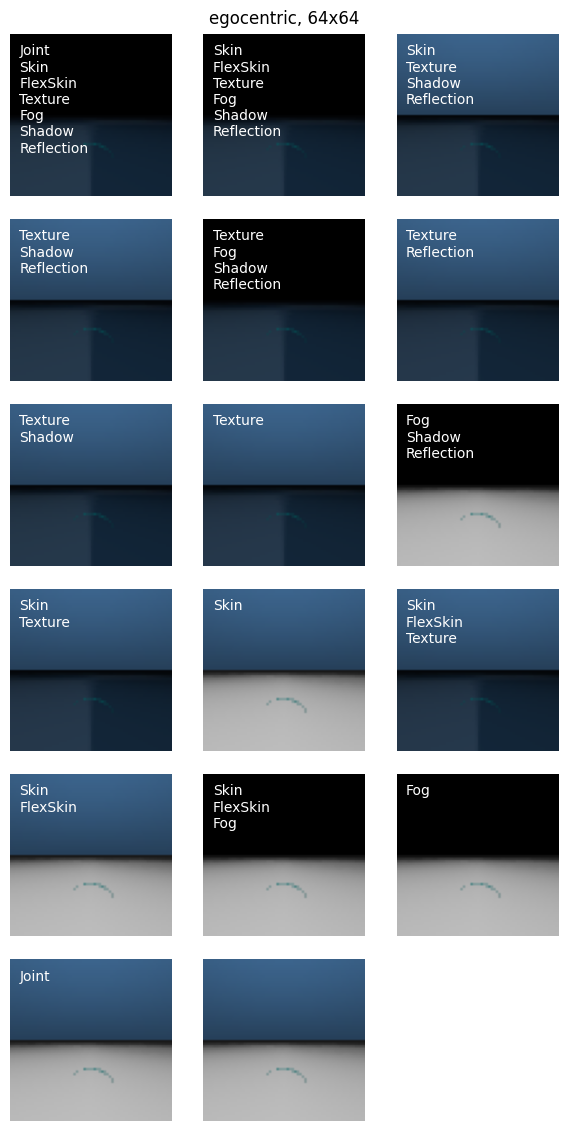

In [42]:
results = []
for basics in [
    dict(model=model, camera="side", res=256, backend="egl"),
    dict(model=model, camera="egocentric", res=256, backend="egl"),
    dict(model=model, camera="egocentric", res=64, backend="egl"),
]:
    fig, axs = plt.subplots(6, 3, figsize=(6, 11.5))
    i = 0
    cam = basics["camera"]
    res = basics["res"]
    for setup in setups:
        result = basics.copy()
        result.update(setup)
        plt.sca(axs.flat[i])
        plt.imshow(example_rendering(**result))
        lbl = ""
        for visFeature in ['visJoint', 'visSkin', 'visFlexSkin', 'visTexture', 'visFog', 'visShadow', 'visReflection']:
            if result[visFeature]:
                lbl += visFeature[3:]+'\n'
        plt.text(0.05*res, 0.05*res, lbl, va="top", color="w")#, transform=plt.gca().transAxes)
        i += 1
        if i>=axs.size:
            break
    for ax in axs.flat:
        ax.axis("off")
    plt.suptitle(f"{cam}, {res}x{res}")
    plt.tight_layout()
    plt.savefig(f"rendering/plots/example_renderings_local_{cam}_{res}x{res}.png", dpi=300, bbox_inches="tight")
    plt.show()